In [1]:
import pandas as pd

df = pd.read_csv('adult.data.csv')
df



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
#analyze the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Perfect! Now we know that our dataset contains no empty cells as all 15 columns have 32651 entries.


First Task: How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (race column) 
I´ll start by printing the unique values of the race column to get a feel for it.

In [3]:
df["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

Good. Now its time to print out a Pandas Series with each race and the number of people from said race.


<AxesSubplot:ylabel='Race'>

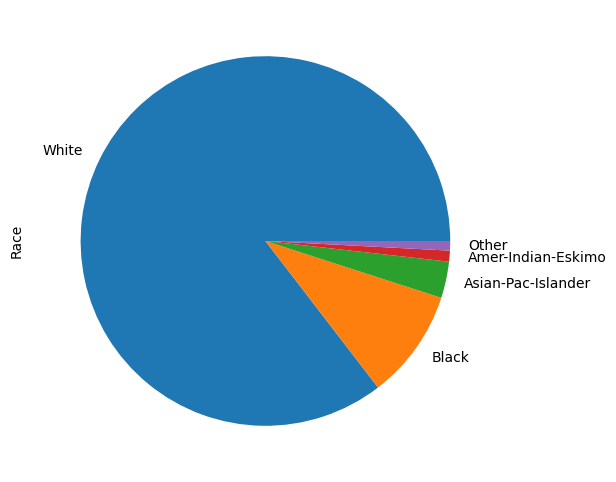

In [4]:
represented = df["race"].value_counts()
represented.plot.pie(figsize = (6,6), ylabel = 'Race')

As you can see, these are mostly white people.


In [5]:
avg_age = df.groupby(["sex"]).age.mean()
print('Average Age of men: ' + str(avg_age["Male"].round(1)) + ' years')

Average Age of men: 39.4 years


In [7]:
bs_holder = df["education"].value_counts()
x = bs_holder["Bachelors"]
y = bs_holder.sum()
bs_percent = (x/y)*100
print('Percentage of people with a Bachelors Degree: ' + str(bs_percent.round(1)) + '%')

Percentage of people with a Bachelors Degree: 16.4%


In [8]:
high = df.loc[df['education'].isin(["Bachelors","Masters", "Doctorate"])]
high_earn_total = len(high)

#ok so apparently you need to use to squared brackets to select multiple indexes :))))
#high.sum() to get total number of people with higher education
x = high.loc[high['salary'] == '>50K']
high_num = len(high.loc[high['salary'] == '>50K'])
high_earn_total
het_percent = round(100 * (high_num/high_earn_total),1)
print('Percentage of people with higher education who earn 50K or more: ' + str(het_percent) + '%')

Percentage of people with higher education who earn 50K or more: 46.5%


In [9]:
low = df.loc[~df['education'].isin(["Bachelors","Masters", "Doctorate"])]
low_total = len(low)
low_num = len(low.loc[low['salary'] == '>50K'])
let_percent = round(100* (low_num/low_total), 1)
print('Percentage of people without higher education who earn 50K or more: ' + str(let_percent) + '%')

Percentage of people without higher education who earn 50K or more: 17.4%


In [13]:
hpw_min = df["hours-per-week"].min()
print('Minimum hours per week: ' +str(hpw_min))

Minimum hours per week: 1


In [14]:
num_of_min = df.loc[df['hours-per-week'] ==1 ]
num_of_min

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
1036,66,Self-emp-inc,150726,9th,5,Married-civ-spouse,Exec-managerial,Husband,White,Male,1409,0,1,?,<=50K
1262,69,?,195779,Assoc-voc,11,Widowed,?,Not-in-family,White,Female,0,0,1,United-States,<=50K
5590,78,?,363134,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,0,1,United-States,<=50K
5632,45,?,189564,Masters,14,Married-civ-spouse,?,Wife,White,Female,0,0,1,United-States,<=50K
5766,62,?,97231,Some-college,10,Married-civ-spouse,?,Wife,White,Female,0,0,1,United-States,<=50K
5808,76,?,211574,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,<=50K
8447,67,?,244122,Assoc-voc,11,Widowed,?,Not-in-family,White,Female,0,0,1,United-States,<=50K
9147,75,?,260543,10th,6,Widowed,?,Other-relative,Asian-Pac-Islander,Female,0,0,1,China,<=50K
11451,27,Private,147951,HS-grad,9,Never-married,Machine-op-inspct,Other-relative,White,Male,0,0,1,United-States,<=50K


In [15]:
hgh_sal = len(num_of_min.loc[num_of_min['salary'] == '>50K'])

In [16]:
percent_rich = hgh_sal/len(num_of_min)*100

In [17]:
print('Percentage of people who work the minimum number of hours per week and earn more than 50K: ' + str(percent_rich) + '%')

Percentage of people who work the minimum number of hours per week and earn more than 50K: 10.0%


In [18]:
high_earn = df.loc[df['salary'] == '>50K']
high_earn

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [19]:
country_high = high_earn['native-country'].value_counts()/df['native-country'].value_counts()*100
country_high

?                             25.042882
Cambodia                      36.842105
Canada                        32.231405
China                         26.666667
Columbia                       3.389831
Cuba                          26.315789
Dominican-Republic             2.857143
Ecuador                       14.285714
El-Salvador                    8.490566
England                       33.333333
France                        41.379310
Germany                       32.116788
Greece                        27.586207
Guatemala                      4.687500
Haiti                          9.090909
Holand-Netherlands                  NaN
Honduras                       7.692308
Hong                          30.000000
Hungary                       23.076923
India                         40.000000
Iran                          41.860465
Ireland                       20.833333
Italy                         34.246575
Jamaica                       12.345679
Japan                         38.709677


In [20]:
rich = df.loc[df['salary'] == '>50K']
rich

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [23]:
india_rich = rich.loc[rich['native-country'] == 'India'] 
print('Top Occupation of indians who earn more than 50K: ' + str(india_rich['occupation'].value_counts().idxmax()))

Top Occupation of indians who earn more than 50K: Prof-specialty
